In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [4]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [5]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

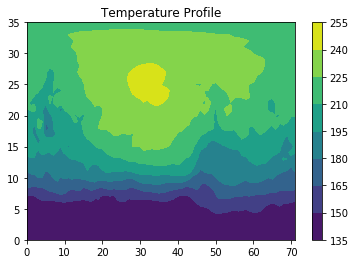

In [6]:
example_data = T[50,5,:, :]
plt.contourf(example_data)
plt.colorbar()
plt.title("Temperature Profile")
plt.show()

In [7]:
albedo = DS.ALBEDO.values

In [8]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [15]:
st = DS.TSK.values

In [16]:
st.shape

(240, 36, 72)

In [9]:
d_c = DS.TAU_OD.values

In [10]:
d_c.shape 

(240, 52, 36, 72)

In [11]:
tsf = DS.TOASW.values #top solar flux

In [12]:
tsf.shape

(240, 36, 72)

In [13]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [14]:
bsf.shape

(240, 36, 72)

Let's combine the data together, for the equator line

In [54]:
e_in = [] #equator input
e_out = [] #equator output
e_t = [] #equator input and output
for i in range(240):
    for j in range(72):
        input_array = list(T[i,:,18,j]) #start with temp profile
        input_array+=list(d_c[i,:,18,j]) #add dust profile
        input_array.append(albedo[i,18,j])#add albedo
        input_array.append(st[i,18,j])#add surface temp
        input_array.append(tsf[i,18,j]) #add top solar flux
        e_in.append(input_array) #appends input to input array
        e_out.append(bsf[i,18,j]) #appends output to output array
        total_array = input_array + [bsf[i,18,j]] #adds input and output data together
        e_t.append(total_array) #appends everything to total array

In [56]:
e_t = np.array(e_t)
e_t.shape

(17280, 108)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(e_t)
a_t = scaler.transform(e_t)

In [69]:
e_t

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26558  , 229.31334  , 231.98065  , ..., 187.20706  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.2537   , 229.8646   , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45032  , 232.25151  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [70]:
a_t

array([[0.7235944 , 0.86352885, 0.8959441 , ..., 0.38041532, 0.09326209,
        0.0493786 ],
       [0.6461687 , 0.8367299 , 0.87118983, ..., 0.31293392, 0.01814741,
        0.00695281],
       [0.6035547 , 0.8138596 , 0.84642625, ..., 0.26337886, 0.        ,
        0.        ],
       ...,
       [0.8248186 , 0.7983631 , 0.77745795, ..., 0.92279553, 0.94047093,
        0.8609505 ],
       [0.8871317 , 0.8693553 , 0.8545749 , ..., 0.9563103 , 0.9663615 ,
        0.8867595 ],
       [0.9280405 , 0.9139615 , 0.9019637 , ..., 0.9790988 , 0.9849983 ,
        0.90444124]], dtype=float32)

In [72]:
scaler.inverse_transform(a_t) #we can inverse the scaling!

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26556  , 229.31335  , 231.98065  , ..., 187.20708  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.25371  , 229.86458  , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45033  , 232.25153  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [79]:
e_in = np.array(e_in)
e_out = np.array(e_out)

In [80]:
np.array_equal(e_in,e_t[:,:107])

True

In [83]:
np.array_equal(e_out,e_t[:,107]) #we can just use e_t array...

True

In [84]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(a_t, test_size=0.2, random_state=42)

In [85]:
train_set.shape

(13824, 108)

In [86]:
test_set.shape

(3456, 108)

In [90]:
train_in = train_set[:,:107] #training input
train_out = train_set[:,107] #training output
test_in = test_set[:,:107] #training input
test_out = test_set[:,107:] #training output

In [95]:
test_out

array([[0.5965668 ],
       [0.19768722],
       [0.        ],
       ...,
       [0.57830584],
       [0.8205837 ],
       [0.6920409 ]], dtype=float32)

In [94]:
test_set

array([[0.6424422 , 0.62677634, 0.6025467 , ..., 0.7299129 , 0.66896087,
        0.5965668 ],
       [0.29431593, 0.32302964, 0.5538244 , ..., 0.2964778 , 0.26201406,
        0.19768722],
       [0.37768137, 0.4983896 , 0.53918505, ..., 0.2383877 , 0.        ,
        0.        ],
       ...,
       [0.56051564, 0.54999864, 0.5254264 , ..., 0.5873108 , 0.6390975 ,
        0.57830584],
       [0.91349864, 0.9103886 , 0.89968896, ..., 0.8769425 , 0.85813004,
        0.8205837 ],
       [0.6897023 , 0.6760484 , 0.6534691 , ..., 0.7302308 , 0.7657063 ,
        0.6920409 ]], dtype=float32)

Let's try linear regression

In [96]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_in, train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(train_in) #prediction
lin_mse = mean_squared_error(train_out, train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

0.013295249